### `chat_id ` из Телеграма:

In [ ]:
1676035524

------------------

##  <ins>Задание 1.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project1_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

In [ ]:
import pandas as pd
import scipy
import numpy as np
from scipy.stats import anderson_ksamp
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import seaborn as sns

In [ ]:
df = pd.read_csv('hist_telesales.csv')
df.head(20)

,ID,Флаг дозвона,Флаг продажи,Расходы,PV,NPV
0,0,1,0,90,0,-90
1,1,0,0,5,0,-5
2,2,0,0,68,0,-68
3,3,1,0,22,0,-22
4,4,1,0,22,0,-22
5,5,1,1,367,2397,2030
6,6,1,1,49,1213,1164
7,7,0,0,26,0,-26
8,8,0,0,35,0,-35
9,9,0,0,61,0,-61


Скрипт не влияет на вероятность дозвона. \\
PV по заданию слишком долго созревающая метрика. \\
NPV = PV - Расходы, поэтому тоже долго созревает. \\
Увеличенные расходы могут означать как успешность скрипта (расходы на вознаграждение оператора), так и его неуспешность (длительный разговор, необязательно окончившийся продажей). \\
Поэтому в качестве ключевой метрики выбираем продажу.

### 2. Альтернатива в критерии.

Вероятность продажи выше во втором варианте скрипта (правосторонняя альтернатива). \\
Вероятность продажи = количество продаж / количество звонков

### 3.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

In [ ]:
p = df["Флаг продажи"].mean()
MDE = 0.08 * p
z1 = scipy.stats.norm.ppf(0.95, loc=0, scale=1)
z2 = scipy.stats.norm.ppf(0.2, loc=0, scale=1)
k = 0.5
N = (p * (1-p) * (z1 - z2) ** 2) / (k * MDE ** 2)
print('p =', p, '\nk = 0.5\nMDE =', MDE, '\nz_(1-alpha) =', z1, '\nz_beta =', z2, '\nN =', N.round())

p = 0.3021715330995967 
k = 0.5
MDE = 0.024173722647967737 
z_(1-alpha) = 1.6448536269514722 
z_beta = -0.8416212335729142 
N = 4462.0


### 3.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project1_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
24808

### 4. Принятие решения. Расписать подробно с аргументами.

In [ ]:
dfc = pd.read_csv('Контроль.csv')
dft = pd.read_csv('Тест.csv')
x_success = dfc["Флаг продажи"].sum()
x_cnt = dfc["Флаг продажи"].count()
y_success = dft["Флаг продажи"].sum()
y_cnt = dft["Флаг продажи"].count()
print(x_success/x_cnt, y_success/y_cnt)
p_value = proportions_ztest([x_success, y_success], [x_cnt, y_cnt])[1] / 2
if (p_value < 0.05) and (x_success/x_cnt < y_success/y_cnt):
  print('Отклоняем нулевую гипотезу')
else:
  print('Не отклоняем нулевую гипотезу')

0.29762438368444644 0.32227700582698343
Отклоняем нулевую гипотезу


Таким образом, вероятность продажи выше во втором варианте скрипта. Тест успешен.

------------------

##  <ins>Задание 2.</ins>

### 0. Запосить у бота в Телеграме условие командой `/get_project2_desc`.

### 1. Необходимо выбрать метрику и привести аргументацию.

In [ ]:
df2 = pd.read_csv('hist_credit_card.csv')
df2.head(20)

,ID,Возраст,Доход клиента,Вероятность банкротства,Флаг утилизации счёта,Расходы,PV КК,PV услуги,NPV
0,0,19,21620.835463,0.138061,0,102,0,0,-102
1,1,27,24897.990863,0.035508,1,409,11686,1754,13031
2,2,50,23989.526947,0.098793,0,16,0,0,-16
3,3,18,38442.409756,0.365661,1,788,13738,1578,14528
4,4,24,21291.521612,0.036909,1,1048,6594,2213,7759
5,5,19,22957.947147,0.021514,1,110,33316,1692,34898
6,6,27,22217.477344,0.319460,0,57,0,0,-57
7,7,46,29584.430233,0.324886,1,371,5859,2529,8017
8,8,27,21730.692059,0.254344,1,712,9981,3758,13027
9,9,41,34909.175512,0.017871,1,131,8794,5315,13978


Скрипт не влияет на возраст, доход клиента, вероятность его банкротства. \\
Т.к. целью теста является увеличение доходности КК + услуги, то нужно брать общий прогноз дохода с клиента, то есть NPV. Он учитывает как изменение доходов, так и изменение расходов. \\
Контрольной метрикой может быть PV КК, потому что новый вариант продажи не должен повлиять на экономику основного продукта.

### 2. Альтернатива в критерии.

NPV выше при новом агрессивном способе (правосторонняя альтернатива).

### 3. Нужно выбрать параметр(-ы), влияющий(-ие) на целевую метрику. Привести аргументацию.

<ipython-input-11-aeb2425f4f0b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a[i_name][y] = pearsonr(i_values, j_values)[0]


         ID   Возраст  Доход клиента  Вероятность банкротства  \
0  1.000000 -0.002624       0.004518                 0.001279   
1 -0.002624  1.000000       0.001514                -0.004102   
2  0.004518  0.001514       1.000000                -0.000882   
3  0.001279 -0.004102      -0.000882                 1.000000   
4 -0.000964  0.007277       0.000706                -0.215398   
5 -0.000077  0.002460       0.001032                -0.099635   
6 -0.003181  0.003447      -0.002142                -0.043319   
7 -0.005220  0.006117      -0.001937                -0.139128   
8 -0.003480  0.003747      -0.002269                -0.049433   

   Флаг утилизации счёта   Расходы     PV КК  PV услуги       NPV  
0              -0.000964 -0.000077 -0.003181  -0.005220 -0.003480  
1               0.007277  0.002460  0.003447   0.006117  0.003747  
2               0.000706  0.001032 -0.002142  -0.001937 -0.002269  
3              -0.215398 -0.099635 -0.043319  -0.139128 -0.049433  
4        

<Axes: >

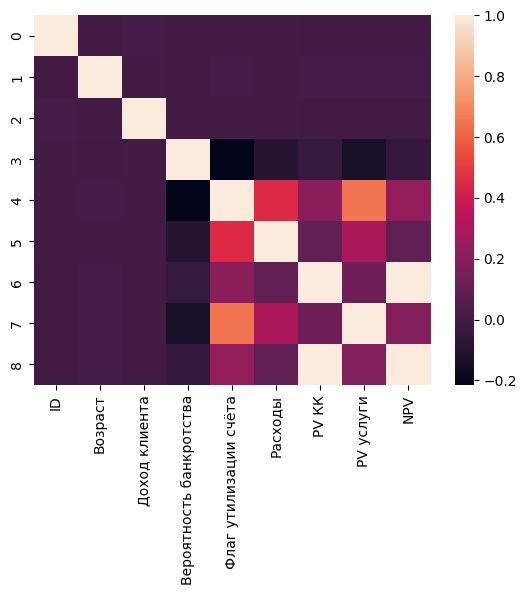

In [ ]:
a = pd.DataFrame([[0 for j in range(9)] for i in range(9)])
a.columns = df2.columns
x, y = 0, 0
for i_name, i_values in df2.items():
  for j_name, j_values in df2.items():
    a[i_name][y] = pearsonr(i_values, j_values)[0]
    y += 1
  x += 1
  y = 0
print(a)
sns.heatmap(a)

На NPV влияют (по убыванию корреляции): \\
1) PV КК \\
2) Утилизация счета \\
3) PV услуги \\
4) Расходы \\
5) Вероятность банкротства

### 4.1. Каков размер выборки? Привести аргументацию и написать как получилось то или иное число.

In [ ]:
p2 = df2["NPV"].mean()
sigma2 = df2["NPV"].std()
MDE2 = 0.03 * p2
z12 = scipy.stats.norm.ppf(0.95, loc=0, scale=1)
z22 = scipy.stats.norm.ppf(0.15, loc=0, scale=1)
k2 = 0.5
N2 = (sigma2 ** 2 * (z12 - z22) ** 2) / (k2 * MDE2 ** 2)
print('p =', p2, '\nsigma =', sigma2, '\nk = 0.5\nMDE =', MDE2, '\nz_(1-alpha) =', z12, '\nz_beta =', z22, '\nN =', N2.round())

p = 8560.211885927549 
sigma = 21758.627388539626 
k = 0.5
MDE = 256.8063565778265 
z_(1-alpha) = 1.6448536269514722 
z_beta = -1.0364333894937898 
N = 103221.0


### 4.2. Необходимо запросить у бота в Телеграме выборку полученного размера командой `/get_project2_sample {размер выборки}` и вписать <ins>код выборки</ins>:

In [ ]:
63221

### 5. Проверка на однородность, применение критерия. Принятие решения. Расписать подробно с аргументами.

Гипотеза: выборки однородны \\
Альтернатива: выборки неоднородны

In [ ]:
dfc2 = pd.read_csv('Контроль.csv')
dft2 = pd.read_csv('Тест.csv')
statistic02, critical_values02, pvalue02 = anderson_ksamp([dfc2["PV КК"], dft2["PV КК"]])
if pvalue02 > 0.02:
  print('Выборки неоднородны по PV КК')
else:
  print('Выборки однородны по PV КК')

Выборки неоднородны по PV КК


Т.к. выборки неоднородны по параметру, сильно влияющему на целевую метрику, то их использовать для теста нельзя. Тест провален.